# EDA Boston House Price

by **Nugraha**, Yanuar T. Aditya

----

### Table of Contents

1. [Introduction to the Dataset & Features](#introduction)
2. [Loading the Dataset](#load)
3. [Understand the Dataset](#understand)
4. [Understand the Datatypes](#dtypes)
5. [Visualizing the DV and IVs](#vis1)
6. [Calculate SST](#sst)
7. [SST vs SSR vs SSE](#SSTSSRSSE)
8. [Univariate Linear Regression](#best_feat)
9. [Summary of Univariate LinReg](#summ1)
10. [Multiple Linear Regression](#mlreg)
11. [Goodness-of-Fit](#goodness)
12. [Submission to Kaggle](#kagglesubmission)
13. [Improvement with Random Forest Regression](#nowhereelse)

### Introduction & Features <a name="introduction"></a>

A project for learning few optimal solutions to predict housing prices using Boston Housing Prices, uses supervised learning with multilinear regression (not to be confused with multivariate regression). The provided data by the SKLearn (Boston House) is rather clean and fit for purpose of learning. In practices, there might be a big chance that the data is less useful and preprocessing is rather needed. This project shall not focus on preprocessing such as, interpolate missing values, etc.

There are 13 features are gonna be used according to the database which you can find further details from [here](https://www.kaggle.com/c/boston-housing) and how to load it with SKLearn from [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston).

(As quoted from the DESCR attributes of the dataset) All attribute Information in order are:
* CRIM     per capita crime rate by town
* ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS    proportion of non-retail business acres per town
* CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX      nitric oxides concentration (parts per 10 million)
* RM       average number of rooms per dwelling
* AGE      proportion of owner-occupied units built prior to 1940
* DIS      weighted distances to five Boston employment centres
* RAD      index of accessibility to radial highways
* TAX      full-value property-tax rate per USD 10,000
* PTRATIO  pupil-teacher ratio by town
* B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT    Lower status of the population
* MEDV     Median value of owner-occupied homes in USD 1000's

In the project, each I.V. features versus D.V. correlations will be evaluated to see how relevant they are to build the best predictor. 

### Loading the Dataset <a name="load"></a>

The dataset is available through [Kaggle](www.kaggle.com) but since we're gonna use [SKLearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) anyway, so I picked the latter.

In [1]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.offline as py
from plotly.graph_objs import *

# scikit-learn
from sklearn.datasets import load_boston
from sklearn import metrics

# matplotlib inline
%matplotlib inline

# init plotly for jupyter

py.init_notebook_mode(connected=True)

### Understand the Dataset <a name="understand"></a>

Make sure you understand what informations are provided by the dataset. Read through all the definitions of the features and the target (outcome). Since I will use Pandas as dataframe for most of the data, we need to build the dataframe as the first step. Make sure to visualize it in a good way in such you get the big picture of how the data looks like.

In [2]:
# load
boston = load_boston()

# build the dataframe for all I.Vs (boston['data']) or boston.data
df_boston_data = pd.DataFrame(boston['data'], columns=boston['feature_names'])

# concatenate the D.V (boston['target']) and name id 'HOPRICE'
df_boston_data['HOPRICE'] = pd.Series(boston['target'])
df_boston_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,HOPRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Now we see **HOPRICE** is part of the dataset and we're good to go. Remember, in the real-world data, we mostly will encounter significantly more random data and you would likely need a lot of preprocessing before you see the same structure as shown above.

### Understand the Datatypes <a name="dtypes"></a>

Pandas is capable of easily giving us informations on each features datatype. DataFrame will infer automatically the datatypes and what we're gonna do is to see their types. What we want from this step is to differentiate their types according to the proper statistic types as explained in [here](https://en.wikipedia.org/wiki/Statistical_data_type). As we see below, everything are neither Categorical or Binary, but instead, all are continuous values and as expected the **HOPRICE** itself is not a Categorical thus we're not gonna do any Logistic Regression to create our best fit as Linear Regression (hopefully) will sufficient.

In [3]:
df_boston_data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
HOPRICE    float64
dtype: object


### Start Visualizing D.V without any inputting I.Vs. <a name="vis1"></a>

We ought to visualize the relation between I.Vs (all features) to the D.V to see how significant their impacts to the D.V. That can be done by manually visualizing them and see a pattern that can be fit by our model, which in this case Linear Regression best fit model. However, let's visualize the **HOPRICE** alone and see how we will see the best fit naturally using **Mean** of the data.

To give a better understanding, an equation for linear line is given by:

$$ f(x) = mx + b + e$$

Given the linear equation, *m* is the slope or gradient, or later will be addressed as *coefficient* and *b* is the y-interceptor and residual error as *e*. If there's no valid *x* variables and no residual error, then best fit line would be:

$$ f(0) = b $$

This is saying that the most basic way to estimate house price without an independent variable is to start with the *b* which in most cases interpreted as the *mean* values. Here let's calculate the mean value of **HOPRICE** and plot. 

In [4]:
# calculate mean
m_hoprice = df_boston_data['HOPRICE'].mean()
m_hoprice

22.532806324110698


Since we're gonna do a lot of visualizations, picking best plotting API is important. Here, best option is to use [Seaborn](https://seaborn.pydata.org/) for correlation plot and but for interactive plot, one of the alternative is [Plotly](https://plot.ly/python/). I will try to use both and later, will use Seaborn more often than others since it is specifically purposed for statistical data visualization.



In [5]:
"""PLOTLY.js"""

# scatter plots for housing prices
trace_hoprice = Scatter(
    x=df_boston_data.index,
    y=df_boston_data['HOPRICE'],
    name='HousingPrice',
    mode='markers')

# line for b-val/mean
trace_mhoprice = Scatter(
    x=[0, df_boston_data.shape[0]],
    y=[m_hoprice, m_hoprice],
    name='Mean Values %.2f' % m_hoprice,
    mode='lines',
    line=dict(
        width=3))

# create the data
data = [trace_hoprice, trace_mhoprice]

# layouting and plot
layout = Layout(
    title='Housing Prices vs Mean Values as Best Fit',
    xaxis=dict(title='house index'),
    yaxis=dict(title='house price $1000'),
    showlegend=True)

fig = Figure(data=data, layout=layout)
py.iplot(fig, filename='housing-price-scatter')

### Calculate SST (Total of Squared Error) using Mean Best Fit <a name="SST"></a>

To evaluate the values of the current best fit here, we need to calculate how each elements of the dataset variates from our current best fit line using **Mean** best fit. To do this, we just need to find the $\sum (y_i - \overline y)^2$ and sum all of them with $\overline y$ is the **mean** or *b*. 

Code wise, to do this, let's create another dataframe which comprised of *y*, residual $(y_i - \overline y)$, and squared of the residual $(y_i - \overline y)^2$.

In [6]:
# setup the first column - HOPRICE
df_calc_sst = pd.DataFrame(data=df_boston_data['HOPRICE'])
# df_calc_sse.loc['MEAN'] = df_calc_sse.mean()

# add the residual - RES
df_calc_sst['RES'] = df_calc_sst['HOPRICE'] - df_calc_sst['HOPRICE'].mean()

# add the squared residual -RES2
df_calc_sst['RES2'] = df_calc_sst['RES'] ** 2

# check
df_calc_sst.head()

,HOPRICE,RES,RES2
0,24.0,1.467194,2.152657
1,21.6,-0.932806,0.870128
2,34.7,12.167194,148.040602
3,33.4,10.867194,118.095898
4,36.2,13.667194,186.792183


In [7]:
SST_mean = np.sum(df_calc_sst['RES2'])
SST_mean

42716.29541501979

### SST vs SSR vs SSE <a name="SSTSSRSSE"></a>

Now it is known that the sum of squared residual is **42716.2954** which is now addressed as SST. Later, this SST will be used to be the basic value for the performance benchmarking of our linear best fit model following this simple law:

$$ SST =  SSR + SSE $$

which *SST* is the total of squared error from using mean fit, and *SSE* will be the new sum of squared error from using our linear regression model. *SSR* will be the value to look up to since it represents how **much our linear regression eliminates error from the dataset**. 

Now let's do one of the most interesting in preprocessing the dataset, finding the best features.

### Univariate Linear Regression <a name="best_feat"></a>

Finding the best features, by meaning, is to find the best correlated features which contributes to the dependent variable D.V which in this case **HOPRICE**. Obvious selection, would be to guess the best feature and for the sake of it, let's pick feature **RM** number of rooms in the house. Let's start by visualizing X-Y scattered plot with **RM** for the X-axis and **HOPRICE** for the Y-axis.

In [8]:
trace_rm = Scatter(
    x=df_boston_data['RM'],
    y=df_boston_data['HOPRICE'],
    name='room vs house price',
    mode='markers')

# layouting and plot
layout = Layout(
    title='Number of Rooms vs Housing Prices',
    xaxis=dict(title='number of rooms'),
    yaxis=dict(title='house price $1000'),
    showlegend=True)

fig = Figure(data=[trace_rm], layout=layout)
py.iplot(fig, filename='housing-price-vs-rooms-scatter')

Here as you can see there is a **trend** between growing number of rooms to the increasing price of the house. The trend here can be found by Linear Regression which gives us the best coefficient *m* and *intercept* which satisfy equation in [here](#vis1) for given independent feature. 

To do this, let's create an object of LinearRegression class from Scikit-Learn.

In [9]:
# create an object for Linear Regression
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

Now, prepare the feature data **RM** and target **HOPRICE**, and split the training and test ratio by an arbitrary number of 0.8 which means 80% of all sample data will be for training to get best fit line and 20% for the test. One can say that pick the ratio either 80/20 or 70/30.

In [10]:
# split the training and test
from sklearn import cross_validation
x_train, x_test, y_train, y_test = cross_validation.train_test_split(df_boston_data['RM'], 
                                                                     df_boston_data['HOPRICE'],
                                                                     train_size=0.8)

print('We have training data with {} and {} number or rows'.format(x_train.shape, y_train.shape))
print('We have test data with {} and {} number of rows'.format(x_test.shape, y_test.shape))

We have training data with (404,) and (404,) number or rows
We have test data with (102,) and (102,) number of rows


/Users/januaditya/Library/Anaconda/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



Before we use the splitted training and test data, the *fit* method only accepts 2D array input, thus we need to reshape above set to (*N_samples*, 1) using *reshape*. Then, we can use the training set *x_train* and *y_train* as input to the fitting method from the *lreg* object.

In [11]:
# since SKLearn has special requirement for one feature data
x_train_sk = x_train.values.reshape(-1,1)
y_train_sk = y_train.values.reshape(-1,1)
x_test_sk = x_test.values.reshape(-1,1)
y_test_sk = y_test.values.reshape(-1,1)

# fit
lreg.fit(x_train_sk, y_train_sk)

print('coefficients: %.4f' % lreg.coef_)
print('y-intercept: %.4f' % lreg.intercept_)

coefficients: 9.1126
y-intercept: -34.6266


Now with known coefficient *m* and y-intercept *b*, the equation shall be:

$$ \hat y = mx + b \\
\hat y = 8.7567x - 32.6496 
$$

The best fit now can be visualize using Seaborn *regplot* function.

Text(0.5,1,'RM vs HOPRICE with f(x)=9.1126x + (-34.6266) best fit')

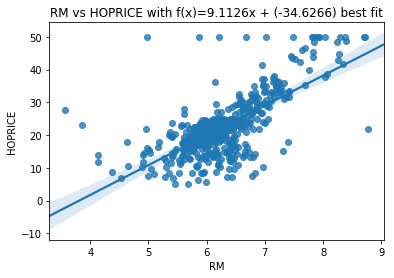

In [12]:
ax = sns.regplot(x='RM', y='HOPRICE', data=df_boston_data)
ax.set_title('RM vs HOPRICE with f(x)=%.4fx + (%.4f) best fit' % (lreg.coef_, lreg.intercept_))

### Evaluate the SSE of the Best Fit (Training vs Test)

Now that we have the model, we have to predict using both training and test sets. To evaluate the accuracy of the model, we refer back to the SSE of both. Let's predict using both sets:

In [13]:
# predict train
pred_train = lreg.predict(x_train_sk)

# create dataframe to show
df_result = pd.DataFrame(data=np.column_stack([x_train_sk, y_train_sk, pred_train]), 
                         columns=['XTRAIN', 'YTRAIN', 'PREDTRAIN'])

# find error (RES) and RES**2
df_result['RES'] = df_result['PREDTRAIN'] - df_result['YTRAIN'].mean()

# add the squared residual -RES2
df_result['RES2'] = df_result['RES'] ** 2

df_result.head()

,XTRAIN,YTRAIN,PREDTRAIN,RES,RES2
0,5.599,13.9,16.395113,-6.066520,36.802667
1,6.232,21.2,22.163420,-0.298214,0.088931
2,6.453,22.0,24.177315,1.715682,2.943563
3,6.649,13.9,25.963394,3.501761,12.262328
4,6.415,25.0,23.831035,1.369401,1.875259


In [14]:
# predict test
pred_test = lreg.predict(x_test_sk)

# create dataframe to show
df_result_test = pd.DataFrame(data=np.column_stack((x_test_sk, y_test_sk, pred_test)), 
                              columns=['XTEST', 'YTEST', 'PREDTEST'])

# find error (RES) and RES**2
df_result_test['RES'] = df_result_test['PREDTEST'] - df_result_test['YTEST'].mean()

# add the squared residual -RES2
df_result_test['RES2'] = df_result_test['RES'] ** 2

df_result_test.head()

,XTEST,YTEST,PREDTEST,RES,RES2
0,8.375,50.0,41.691826,18.877120,356.345654
1,7.079,28.7,29.881833,7.067127,49.944290
2,4.368,8.8,5.177443,-17.637263,311.073036
3,5.813,14.5,18.345220,-4.469486,19.976302
4,5.965,19.6,19.730343,-3.084363,9.513295


Now calculate the SSE from the both training and test data and see how much we can explain the *variance* arised when we're using *Mean* best fit model. 

### Summary of the Univariate Regression Model <a name="summ1"></a>

Now since we have SSE of our linear regression model from both training and test dataset, now we want to summarize of how the **SSR** shall be. Using, training dataset, the **SSR** shall be $SST-SSE$:

In [15]:
sst_train = np.sum((df_result['YTRAIN'] - np.mean(df_result['YTRAIN'])) ** 2)
sst_test = np.sum((df_result_test['YTEST'] - np.mean(df_result_test['YTEST'])) ** 2)

sse_train = np.sum((pred_train - y_train_sk) ** 2)
sse_test = np.sum((pred_test - y_test_sk) ** 2)

ssr_train = sst_train - np.ravel(sse_train)
ssr_test = sst_test - np.ravel(sse_test)

print('SST_Train is %.4f' % sst_train)
print('SST_Test is %.4f' % sst_test)

print('SSR_Train is %.4f' % ssr_train)
print('SSR_Test is %.4f'% ssr_test)

print('R2_Train (manual) is %.4f' % (ssr_train/sst_train))
print('R2_Test (manual) is %.4f' % (ssr_test/sst_test))

print('R2_Train (SK_metrics) is %.4f' % metrics.r2_score(y_train_sk, pred_train))
print('R2_Test (SK_metrics) is %.4f' % metrics.r2_score(y_test_sk, pred_test))

SST_Train is 34260.4753
SST_Test is 8445.6679
SSR_Train is 15565.1194
SSR_Test is 5072.9663
R2_Train (manual) is 0.4543
R2_Test (manual) is 0.6007
R2_Train (SK_metrics) is 0.4543
R2_Test (SK_metrics) is 0.6007


Well well well, it seems like we have managed to reduce the squared residual errors by almost 90% on the test data just by using number of rooms as a single independent variable. What if we add more? Enter *Multiple Linear Regression*.

---

### Multiple Linear Regression: Correlations <a name="mlreg"></a>

Now we need to find correlation between features because it is very useful to know whether some pairs of features are correlated and how much. To find the correlation $R^2$ we will use *Pearson* correlation method provided by the Pandas DataFrame.

In [16]:
# drop the target HOPRICE first, since we want only feature-to-feature correlations
df_boston_pearson = df_boston_data.corr(method='pearson')

The method returns another DataFrame of correlation matrix which explains how each features correlate with others. The value is always between -1 and 1. 1 means total correlation, -1 negative correlation and 0 for pair without correlation.

Other than feature-to-feature correlation, correlations between features and target is also need to be calculated to tell how each attribute is able to predict the target. This is also known as feature *predictivity*.

In [17]:
# sort the attribute from the most predictive
corr_with_target = df_boston_pearson.iloc[-1][:-1]

# sort from the highest
predictivity_sorted = corr_with_target.sort_values(ascending=False)
predictivity_sorted

RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: HOPRICE, dtype: float64

Now if we take a look visually into two features, *RM* which gives us the highest *Pearson* correlation value and *LSTAT* for the lowest (negative) correlation, then we'll see an interesting thing.

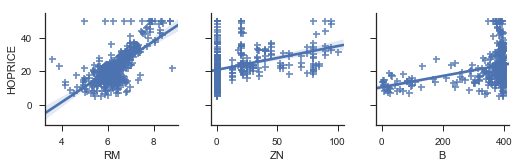

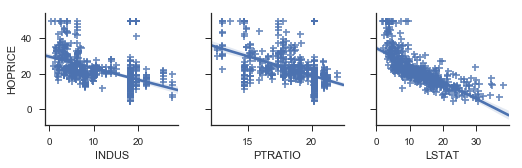

In [18]:
# let's plot correlation of RM and LSTAT w.r.t HOPRICE
sns.set(style="ticks")
sns.pairplot(df_boston_data, 
             y_vars=['HOPRICE'],
             markers='+',
             x_vars=['RM', 'ZN', 'B'], 
             kind='reg')
sns.pairplot(df_boston_data, 
             y_vars=['HOPRICE'],
             markers='+',
             x_vars=['INDUS', 'PTRATIO', 'LSTAT'], 
             kind='reg')

We can see in *RM*, *ZN*, *B* (positive correlation) and *INDUS*, *PTRATIO*, *LSTAT* (negative correlation) plot, that the coefficient or trend line gradient is contrary. On *LSTAT-HOPRICE* plot, this is expected since in the definition of *LSTAT*, the higher number of lower class population in an area gives a sign that the neighborhood is gonna be less expensive. That is enough motivation not to discard a negative correlated features by just looking at the *R* value. 

Thus, let's update the predictivity by sorting absolute value instead.

In [19]:
predictivity_sorted = corr_with_target[abs(corr_with_target).argsort()[::-1]]
predictivity_sorted

LSTAT     -0.737663
RM         0.695360
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.385832
RAD       -0.381626
AGE       -0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: HOPRICE, dtype: float64

### Multiple Linear Regressions: Using Selected Features and Validation

Now, lets create a threshold *t* in which we takes a feature $X_i$ if the $R_i > t$. For now, let's assume that *t* value is **0.5** (you can play with it and try to pick different values).

In [20]:
# threshold
t = 0.5
selected_feature = predictivity_sorted[abs(predictivity_sorted) > t].index
selected_feature

Index(['LSTAT', 'RM', 'PTRATIO'], dtype='object')

Now create a linear regression object and run the *fit* and *predict* method to the selected features.

In [21]:
X = df_boston_data[selected_feature]
y = df_boston_data['HOPRICE']

# split
xn_train, xn_test, yn_train, yn_test = cross_validation.train_test_split(X, y, train_size=0.8)

In [22]:
# object of Linear Regression
mlReg = LinearRegression()

# fit using training data
mlReg.fit(xn_train, yn_train)

# predict using training data
pred_yn_train = mlReg.predict(xn_train)

Now we have 2 linear regression models, the first one was using only *RM* feature and now we are using more features, according to the rank given by the *Pearson* feature-to-target correlations. Let's create a series for that. Lets compare the two models by their respective squared error.

In [23]:
# show summary for validation using training data
df_lm_summary = xn_train.copy()
df_lm_summary['TARGET'] = yn_train
df_lm_summary['PRED-Y'] = pred_yn_train
df_lm_summary['RES'] = df_lm_summary['PRED-Y'] - df_lm_summary['TARGET'].mean()
df_lm_summary['RES2'] = df_lm_summary['RES'] ** 2
df_lm_summary.head()

,LSTAT,RM,PTRATIO,TARGET,PRED-Y,RES,RES2
287,7.14,6.209,16.6,23.2,27.055247,4.362426,19.030757
356,17.60,6.212,20.2,17.8,17.718091,-4.974731,24.747949
60,13.15,5.741,19.7,18.7,18.427607,-4.265214,18.192053
307,7.53,6.849,18.4,28.2,28.128123,5.435301,29.542501
255,9.25,5.876,16.4,20.9,24.487762,1.794940,3.221811


In [24]:
# predict using training data
pred_yn_test = mlReg.predict(xn_test)

In [25]:
# show summary for validation using test data
df_lm_summary_test = xn_test.copy()
df_lm_summary_test['TARGET'] = yn_test
df_lm_summary_test['PRED-Y'] = pred_yn_test
df_lm_summary_test['RES'] = df_lm_summary_test['PRED-Y'] - df_lm_summary_test['TARGET'].mean()
df_lm_summary_test['RES2'] = df_lm_summary_test['RES'] ** 2
df_lm_summary_test.head()

,LSTAT,RM,PTRATIO,TARGET,PRED-Y,RES,RES2
99,6.19,7.416,18.0,33.2,31.978344,10.079325,101.592789
312,11.72,6.023,18.4,19.4,21.850536,-0.048483,0.002351
497,14.10,5.794,19.2,18.3,18.646069,-3.252951,10.581690
85,6.53,6.630,18.5,26.6,27.537139,5.638119,31.788391
94,10.59,6.249,18.2,20.6,23.755943,1.856923,3.448163


In [26]:
# sst
sst_n_train = np.sum((df_lm_summary['TARGET'] - np.mean(df_lm_summary['PRED-Y'])) ** 2)
sst_n_test = np.sum((df_lm_summary_test['TARGET'] - np.mean(df_lm_summary_test['PRED-Y'])) ** 2)

sse_n_train = np.sum((yn_train - pred_yn_train) ** 2)
sse_n_test = np.sum((yn_test - pred_yn_test) ** 2)

ssr_n_train = sst_n_train - np.ravel(sse_n_train)
ssr_n_test = sst_n_test - np.ravel(sse_n_test)

print('SST_Train is %.4f' % sst_n_train)
print('SST_Test is %.4f' % sst_n_test)

print('SSR_Train is %.4f' % ssr_n_train)
print('SSR_Test is %.4f'% ssr_n_test)

print('R2_Train (manual) is %.4f' % (ssr_n_train/sst_n_train))
print('R2_Test (manual) is %.4f' % (ssr_n_test/sst_n_test))

print('R2_Train (SK_metrics) is %.4f' % metrics.r2_score(yn_train, pred_yn_train))
print('R2_Test (SK_metrics) is %.4f' % metrics.r2_score(yn_test, pred_yn_test))

SST_Train is 35097.3692
SST_Test is 7567.6374
SSR_Train is 24098.9044
SSR_Test is 4817.3710
R2_Train (manual) is 0.6866
R2_Test (manual) is 0.6366
R2_Train (SK_metrics) is 0.6866
R2_Test (SK_metrics) is 0.6366


### Goodness-of-Fit of the Model <a name="goodness"></a>

Now as usual, calculate the sum of squared error (SSE) or sum of *RES2* column:

In [27]:
SSE_mlreg_train = np.sum(df_lm_summary['RES2'])
SSE_mlreg_test = np.sum(df_lm_summary_test['RES2'])

# put everything in the series
linRegSST = pd.Series(data=[sst_train,
                            sst_test,
                            sst_n_train,
                            sst_n_test])
linRegSSE = pd.Series(data=[sse_train, 
                            sse_test,
                            sse_n_train,
                            sse_n_test])
df_linRegSummary = pd.DataFrame(linRegSSE, columns=['SSE'])
df_linRegSummary['SST'] = linRegSST
df_linRegSummary['SSR'] = df_linRegSummary['SST'] - df_linRegSummary['SSE']
df_linRegSummary['R^2'] = df_linRegSummary['SSR'] / df_linRegSummary['SST']
df_linRegSummary.index = ['UNIVARIATE-val-train',
                          'UNIVARIATE-val-test',
                          'MULTIPLE-val-train',
                          'MULTIPLE-val-test']
df_linRegSummary

,SSE,SST,SSR,R^2
UNIVARIATE-val-train,18695.355944,34260.475322,15565.119377,0.454317
UNIVARIATE-val-test,3372.701667,8445.667941,5072.966274,0.600659
MULTIPLE-val-train,10998.464768,35097.369183,24098.904415,0.686630
MULTIPLE-val-test,2750.266349,7567.637373,4817.371024,0.636575


There you go! It seems like adding features improves the *coefficient of determination* or $R^2$. One reason that might be the cause of the problem why the value is still not good enough is due to a arised dependancies between the features. This phenomenon is well known as *collinearity* which we'll tackle in the next section.



---

### Submission to Kaggle <a name="kagglesubmission"></a>

A lot of things will be skipped till the end, but all the codes should be self explained. For this, what we need are:

* [Training dataset](https://www.kaggle.com/c/5315/download/train.csv) from Kaggle
* [Test dataset](https://www.kaggle.com/c/5315/download/test.csv) from Kaggle
* Selected feature to be used as we have obtained in [here](#mlreg)

Start with listing the training and test dataset provided by the Kaggle:

In [33]:
# training data in idx-1
df_train = pd.read_csv('train_dataset.csv')

# test data in idx-0
df_test = pd.read_csv('test_dataset.csv')

Make sure to use *selected feature* which we have built in [here](#mlreg).

In [34]:
X = df_train[list(map(str.lower, selected_feature))]
y = df_train['medv']

X_test = df_test[list(map(str.lower, selected_feature))]

Now, create an object for the regressor. Then, perform *fit* using training dataset and *predict* using test dataset.

In [35]:
kaggleLReg = LinearRegression()
kaggleLReg.fit(X, y)
predKaggle = kaggleLReg.predict(X)

Lastly, perform the measurement metrics. We are aiming at somewhere between ~5 RMSE which is not good but also not bad :).

In [36]:
print('Performance metric (R2_score) using training data: %.4f' % metrics.r2_score(y, predKaggle))
print('Performance metric (RMSE) using training data: %.4f' % np.sqrt(metrics.mean_squared_error(y, predKaggle)))

Performance metric (R2_score) using training data: 0.6626
Performance metric (RMSE) using training data: 5.3207


Prepare the *.csv* for the submission:

In [37]:
predKaggleSubmission = kaggleLReg.predict(X_test)
df_submission = pd.DataFrame(data=np.column_stack([df_test['ID'].values, predKaggleSubmission]), columns=['ID', 'medv'])
df_submission['ID'] = df_submission['ID'].astype(int)
df_submission.to_csv('Kaggle_Boston_Submission.csv', index=False)

### Improvement with Random Forest Regression <a name="nowhereelse"></a>

Lets try new regression technique using Random Forest.

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [39]:
X_kgl_train = X.values
y_kgl_train = y.values
X_kgl_test = X_test.values

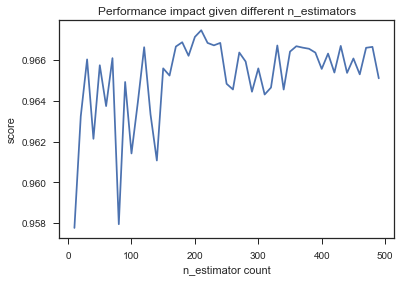

In [40]:
randForest = RandomForestRegressor(n_jobs=-1)
scores = []
estimators = np.arange(10, 500, 10)
for i in estimators:
    randForest.set_params(n_estimators=i)
    randForest.fit(X_kgl_train, y_kgl_train)
    scores.append(randForest.score(X_kgl_train, y_kgl_train))
    
# plot
plt.title("Performance impact given different n_estimators")
plt.xlabel("n_estimator count")
plt.ylabel("score")
plt.plot(estimators, scores)

In [41]:
summ = pd.DataFrame(data=np.column_stack([np.array(estimators), np.array(scores)]), columns=['n_estimator', 'scores'])
print('Best model at n_estimator: %d' % estimators[summ['scores'].argmax()])

Best model at n_estimator: 210


In [42]:
# try with test
randForest.set_params(n_estimators=estimators[summ['scores'].argmax()])
randForest.fit(X_kgl_train, y_kgl_train)
print('Current score with %d n_estimator: %.4f' % (estimators[summ['scores'].argmax()], 
      randForest.score(X_kgl_train, y_kgl_train)))
randForestResult = randForest.predict(X_test)

Current score with 210 n_estimator: 0.9670


In [43]:
# submission .csv
randForestSubmission = pd.DataFrame(data=np.column_stack([df_test['ID'].values, randForestResult]), columns=['ID', 'medv'])
randForestSubmission['ID'] = randForestSubmission['ID'].astype(int)
randForestSubmission.to_csv('Kaggle_Boston_Submission_RandForest.csv', index=False)